# DATA ANALYSIS PROJECT USING PYTHON

# Student Performance Analysis

This notebook explores student academic performance using the `student-mat.csv` dataset. Our objective is to understand how factors like study time, gender, and other behaviors relate to final grades.

We follow these guidelines:
- Use only basic pandas and NumPy operations
- Avoid external statistical libraries
- Plot using matplotlib or seaborn
- Maintain structured code and documentation using Markdown

## Data Loading

Load the dataset using pandas and display a quick preview to understand the structure.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Exploration

We check for missing values, inspect data types, and view dataset size to plan our cleaning strategy.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
# View column data types
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [ ]:
# Dataset dimensions
df.shape

(395, 33)

## Data Cleaning

We handle missing numeric values using the median and remove duplicate entries to ensure clean data.

In [ ]:
import numpy as np

# Fill missing values with median for numeric columns
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype in ['int64', 'float64']:
       median_val = np.median(df[col].dropna())
       df[col] = df[col].fillna(median_val)

# Remove duplicate rows
df = df.drop_duplicates()

## Data Analysis

We answer key questions using basic pandas and NumPy:
1. What is the average final grade (G3)?
2. How many students scored above 15?
3. Is there a correlation between study time and final grade?
4. Which gender has a higher average grade?

In [ ]:
# 1. Average final grade
df['G3'].mean()

np.float64(10.415189873417722)

In [ ]:
# 2. Students scoring above 15
df[df['G3'] > 15].shape[0]

40

In [ ]:
# 3. Correlation: study time vs final grade
df['studytime'].corr(df['G3'])

np.float64(0.09781968965319626)

In [ ]:
# 4. Average final grade by gender
df.groupby('sex')['G3'].mean()

,G3
sex,
F,9.966346
M,10.914439


## Data Visualization

We create basic charts using matplotlib and seaborn to interpret key trends and comparisons.

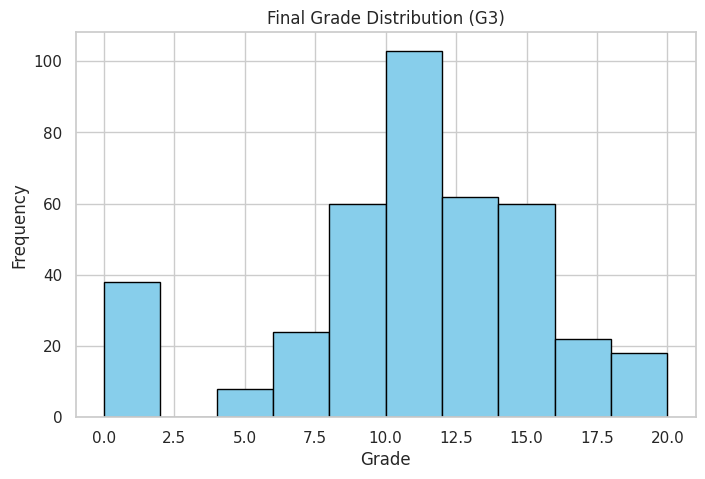

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of final grades
plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Final Grade Distribution (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

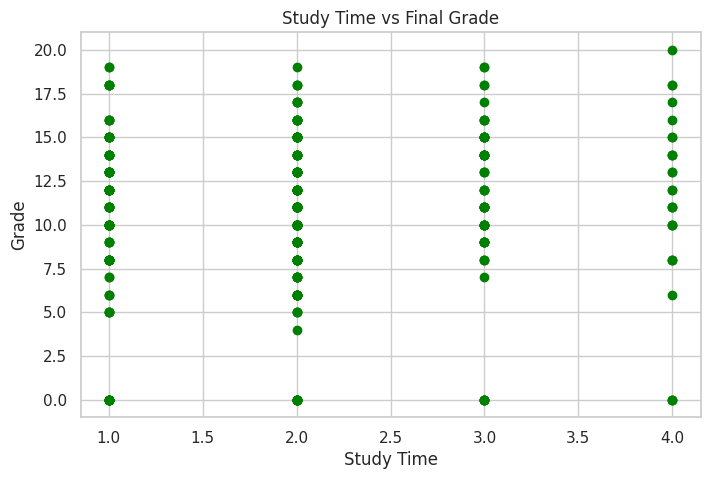

In [ ]:
# 2. Scatter plot: study time vs final grade
plt.figure(figsize=(8,5))
plt.scatter(df['studytime'], df['G3'], color='green')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

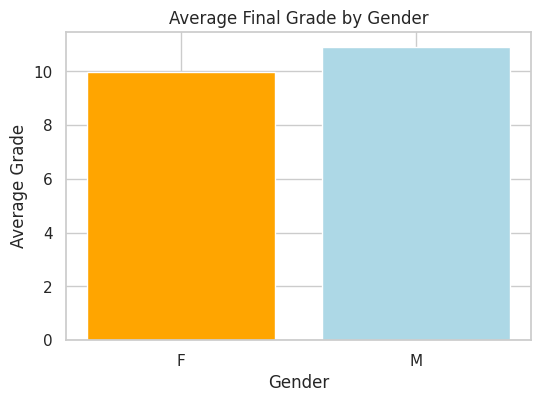

In [ ]:
# 3. Bar chart: average final grade by gender
gender_avg = df.groupby('sex')['G3'].mean()
plt.figure(figsize=(6,4))
plt.bar(gender_avg.index, gender_avg.values, color=['orange', 'lightblue'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

## Conclusion

- The average student grade (G3) is moderate, with a small group scoring above 15.
- A mild positive correlation exists between study time and grades.
- Gender comparison shows that female students tend to perform slightly better on average.

This project demonstrates core data analysis techniques using pandas, NumPy, and visualization libraries, with structured documentation to aid interpretation.